In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
pd.set_option('display.max_colwidth', None)

In [126]:
df1 = pd.read_csv("../data/bert_scores/BERT_similarity1.csv", sep=',')
df2 = pd.read_csv("../data/bert_scores/BERT_similarity2.csv", sep=',')
df3 = pd.read_csv("../data/bert_scores/BERT_similarity3.csv", sep=',')

In [127]:
frames = [df1, df2, df3]
df = pd.concat(frames)
df

,id,score
0,14466574,0.839626
1,23812236,0.366735
2,11834247,0.550217
3,30649221,0.719352
4,25824079,0.713064
...,...,...
280981,3821855,0.771915
280982,20622458,0.878476
280983,36160198,0.822413
280984,5426867,0.765264


In [128]:
data = df.copy()

In [129]:
sentences = pd.read_csv("../data/medical_corpus_clean_preprocessed_v2.tsv", sep=',')

In [130]:
df.describe()

,id,score
count,8.429540e+05,842954.000000
mean,1.972107e+07,0.773491
std,1.138195e+07,0.186604
min,2.900000e+01,-0.172695
25%,9.881131e+06,0.738111
50%,1.971656e+07,0.829918
75%,2.956373e+07,0.880051
max,3.944201e+07,1.000001


The cosine similarity should be between -1 and 1. To obtain cosine similarities, I used the library 'from sklearn.metrics.pairwise import cosine_similarity'. However, it sometimes generated values greater than 1 due to floating-point precision errors. To address this issue, I set those values that were greater than 1 to be equal to 1.

In [131]:
df.loc[df['score'] > 1, 'score'] = 1

In [132]:
similiraty_list = df.score.to_list()

In [133]:
df.describe()

,id,score
count,8.429540e+05,842954.000000
mean,1.972107e+07,0.773491
std,1.138195e+07,0.186604
min,2.900000e+01,-0.172695
25%,9.881131e+06,0.738111
50%,1.971656e+07,0.829918
75%,2.956373e+07,0.880051
max,3.944201e+07,1.000000


In [134]:
data = pd.merge(data, sentences, on='id')
data

,id,score,pol,eng,split,src
0,14466574,0.839626,Urządzenia do odtworzenia i podawania dostarczane są w każdym opakowaniu Helixate NexGen 250 j. m.,Medical devices for reconstitution and administration are provided with each package of Helixate NexGen 250 IU.,train,EMEA
1,23812236,0.366735,DOTYCZĄCE DOSTAWY I STOSOWANIA,Veterinary medicinal product subject to prescription.,train,EMEA_new_crawl
2,11834247,0.550217,51 jeśli u pacjenta wystąpi ból górnej części brzucha po lewej stronie lub ból na szczycie barku; •,• if you get left upper abdominal pain or pain at the tip of your shoulder;,train,EMEA
3,30649221,0.719352,Wydłużenie czasu protrombinowego (PT) (w przypadku jednoczesnego stosowania antagonistów witaminy K).,Prothrombin time (PT) increase (with concomitant vitamin K antagonist therapy).,train,EMEA
4,25824079,0.713064,Zaburzenia serca,Eye disorders Cardiac disorders,train,EMEA_new_crawl
...,...,...,...,...,...,...
842949,3821855,0.771915,"Zmiany obecne po 1 miesiącu podawania produktu były zasadniczo odwracalne w czasie do 1 miesiąca po zaprzestaniu podawania produktu, za wyjątkiem częściowego ustąpienia niektórych zmian w rogówce.",The findings present following 1 month of dosing were largely reversible within 1 month of cessation of dosing with the exception of partial recovery for some of the corneal changes.,test,EMEA_new_crawl
842950,20622458,0.878476,"Delikatnie postukać w strzykawkę, aby usunąć pęcherzyki powietrza.","To remove any bubbles, gently tap the syringe.",test,EMEA_new_crawl
842951,36160198,0.822413,dorosłych pacjentów z nowo rozpoznaną ostrą białaczką limfoblastyczną z chromosomem Philadelphia (Ph+ ALL) w skojarzeniu z chemioterapią.,adult patients with newly diagnosed Philadelphia chromosome positive acute lymphoblastic leukaemia (Ph+ ALL) integrated with chemotherapy.,test,EMEA_new_crawl
842952,5426867,0.765264,"Podczas stosowania przewlekłego w badaniu RE–LY leki z grupy NLPZ zwiększały ryzyko krwawienia o około 50% zarówno w przypadku eteksylanu dabigatranu, jak i warfaryny.","With chronic use in the RE-LY study, NSAIDs increased the risk of bleeding by approximately 50 % on both dabigatran etexilate and warfarin.",test,EMEA_new_crawl


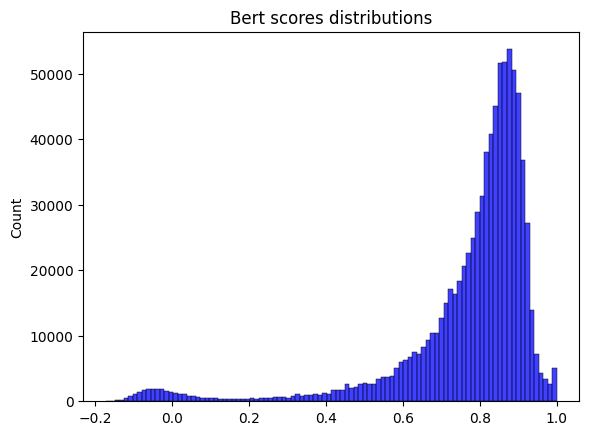

In [135]:
sns.histplot(similiraty_list, bins=100, color='blue', edgecolor='black')
plt.title('Bert scores distributions')
plt.show()

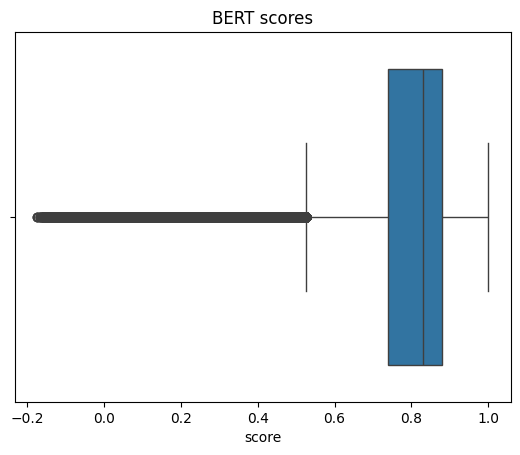

In [136]:
sns.boxplot(x=df["score"])
plt.title('BERT scores')
plt.show()

In [137]:
median_value = df['score'].median()
print(f"The median of the scores is: {median_value}")

The median of the scores is: 0.82991779


In [138]:
df_nan_scores = df[df['score'].isna()]
df_nan_scores

,id,score


In [139]:
df_good_scores = data[data['score'] > 0.83]
df_good_scores

,id,score,pol,eng,split,src
0,14466574,0.839626,Urządzenia do odtworzenia i podawania dostarczane są w każdym opakowaniu Helixate NexGen 250 j. m.,Medical devices for reconstitution and administration are provided with each package of Helixate NexGen 250 IU.,train,EMEA
5,30513235,0.869715,W takim przypadku należy odstąpić od podawania hCG aby uniknąć wystąpienia ciąży mnogiej. • Kontrolowana hiperstymulacja jajników w medycznych programach wspomaganego rozrodu Stosuje się różne protokoły stymulacji.,In that case hCG should be withheld and pregnancy should be avoided in order to prevent multiple gestations. • Controlled ovarian hyperstimulation in medically assisted reproduction programs Various stimulation protocols are applied.,train,EMEA
6,29354410,0.874398,Każda fiolka jednorazowego użytku zawiera 160 mg proszku do sporządzenia 8 ml koncentratu roztworu trastuzumabu emtanzyny do infuzji o stężeniu 20 mg/ml.,deliver 8 ml of 20 mg/ml of trastuzumab emtansine.,train,EMEA_new_crawl
7,22229922,0.852618,4.7 Wpływ na zdolność prowadzenia pojazdów i obsługiwania maszyn,4.7 Effects on ability to drive and use machines,train,EMEA_new_crawl
9,34330160,0.905408,4. 5 Interakcje z innymi lekami i inne rodzaje interakcji,4.5 Interaction with other medicinal products and other forms of interaction,train,EMEA
...,...,...,...,...,...,...
842936,17979726,0.921728,W celu uzyskania dodatkowych informacji dotyczących leczenia produktem Mixtard należy zapoznać się z ulotką dla pacjenta (także część EPAR) bądź skontaktować się z lekarzem lub farmaceutą.,"For more information about treatment with Mixtard, read the package leaflet (also part of the EPAR) or contact your doctor or pharmacist.",test,EMEA_new_crawl
842943,12998604,0.907766,Co to jest lek Memantine Mylan i w jakim celu się go stosuje 2.,What Memantine Mylan is and what it is used for 2.,test,EMEA_new_crawl
842948,19426515,0.845784,"Szczepionki nie powinno podawać się osobom z osłabionym układem odpornościowym, z powodu takich chorób jak białaczka, chłoniak, AIDS bądź chorób osłabiających układ odpornościowy.","The vaccine should not be used in people who have problems with their immune system, either because they have a disease such as leukaemia, lymphoma, AIDS, or because they are taking medicines that affect the immune system.",test,EMEA
842950,20622458,0.878476,"Delikatnie postukać w strzykawkę, aby usunąć pęcherzyki powietrza.","To remove any bubbles, gently tap the syringe.",test,EMEA_new_crawl


In [140]:
negative_scores = data[data['score'] > 0.83]
negative_scores

,id,score,pol,eng,split,src
0,14466574,0.839626,Urządzenia do odtworzenia i podawania dostarczane są w każdym opakowaniu Helixate NexGen 250 j. m.,Medical devices for reconstitution and administration are provided with each package of Helixate NexGen 250 IU.,train,EMEA
5,30513235,0.869715,W takim przypadku należy odstąpić od podawania hCG aby uniknąć wystąpienia ciąży mnogiej. • Kontrolowana hiperstymulacja jajników w medycznych programach wspomaganego rozrodu Stosuje się różne protokoły stymulacji.,In that case hCG should be withheld and pregnancy should be avoided in order to prevent multiple gestations. • Controlled ovarian hyperstimulation in medically assisted reproduction programs Various stimulation protocols are applied.,train,EMEA
6,29354410,0.874398,Każda fiolka jednorazowego użytku zawiera 160 mg proszku do sporządzenia 8 ml koncentratu roztworu trastuzumabu emtanzyny do infuzji o stężeniu 20 mg/ml.,deliver 8 ml of 20 mg/ml of trastuzumab emtansine.,train,EMEA_new_crawl
7,22229922,0.852618,4.7 Wpływ na zdolność prowadzenia pojazdów i obsługiwania maszyn,4.7 Effects on ability to drive and use machines,train,EMEA_new_crawl
9,34330160,0.905408,4. 5 Interakcje z innymi lekami i inne rodzaje interakcji,4.5 Interaction with other medicinal products and other forms of interaction,train,EMEA
...,...,...,...,...,...,...
842936,17979726,0.921728,W celu uzyskania dodatkowych informacji dotyczących leczenia produktem Mixtard należy zapoznać się z ulotką dla pacjenta (także część EPAR) bądź skontaktować się z lekarzem lub farmaceutą.,"For more information about treatment with Mixtard, read the package leaflet (also part of the EPAR) or contact your doctor or pharmacist.",test,EMEA_new_crawl
842943,12998604,0.907766,Co to jest lek Memantine Mylan i w jakim celu się go stosuje 2.,What Memantine Mylan is and what it is used for 2.,test,EMEA_new_crawl
842948,19426515,0.845784,"Szczepionki nie powinno podawać się osobom z osłabionym układem odpornościowym, z powodu takich chorób jak białaczka, chłoniak, AIDS bądź chorób osłabiających układ odpornościowy.","The vaccine should not be used in people who have problems with their immune system, either because they have a disease such as leukaemia, lymphoma, AIDS, or because they are taking medicines that affect the immune system.",test,EMEA
842950,20622458,0.878476,"Delikatnie postukać w strzykawkę, aby usunąć pęcherzyki powietrza.","To remove any bubbles, gently tap the syringe.",test,EMEA_new_crawl


In [141]:
# Calculate quintiles using the quantile method
q1 = df['score'].quantile(0.20)  # 20th percentile (first quintile)
q2 = df['score'].quantile(0.40)  # 40th percentile (second quintile)
q3 = df['score'].quantile(0.60)  # 60th percentile (third quintile)
q4 = df['score'].quantile(0.80)  # 80th percentile (fourth quintile)
q5 = df['score'].quantile(1.00)  # 100th percentile (fifth quintile)

print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}, Q4: {q4}, Q5: {q5}')

Q1: 0.7070549, Q2: 0.802725484, Q3: 0.8520606, Q4: 0.8895534, Q5: 1.0


In [142]:
BERT_above_quantile_20 = df[df['score'] > q1]
BERT_above_quantile_40 = df[df['score'] > q2]
BERT_above_quantile_60 = df[df['score'] > q3]
BERT_above_quantile_80 = df[df['score'] > q4]

In [143]:
BERT_above_quantile_20.to_csv("BERT_above_quantile_20.tsv", sep='\t', index=False)
BERT_above_quantile_40.to_csv("BERT_above_quantile_40.tsv", sep='\t', index=False)
BERT_above_quantile_60.to_csv("BERT_above_quantile_60.tsv", sep='\t', index=False)
BERT_above_quantile_80.to_csv("BERT_above_quantile_80.tsv", sep='\t', index=False)